In [1]:
import pandas as pd

In [25]:
import seaborn as sns

In [2]:
PATH = "/mnt/c/Users/aag12/Downloads/autotagging_genre.tsv.txt"

In [57]:
with open(PATH, 'r') as f:
    raw = f.readlines()

In [58]:
len(raw)

55216

In [59]:
raw[1]

'track_0000214\tartist_000014\talbum_000031\t14/214.mp3\t124.6\tgenre---punkrock\n'

In [60]:
better_d = []
for line in raw[1:]:
    split = line.split("\t")
    new_row = split[:5]
    extra = ",".join(split[5:]).strip()
    extra = ",".join([g.replace("genre---", "") for g in extra.split(",") if g.startswith("genre---")])
    new_row.append(extra)
    better_d.append(new_row)

In [61]:
raw[0].strip().split("\t")

['TRACK_ID', 'ARTIST_ID', 'ALBUM_ID', 'PATH', 'DURATION', 'TAGS']

In [62]:
df = pd.DataFrame(data=better_d, columns=raw[0].strip().split("\t"))

In [27]:
df

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,TAGS
0,track_0000214,artist_000014,album_000031,14/214.mp3,124.6,punkrock
1,track_0000215,artist_000014,album_000031,15/215.mp3,151.4,metal
2,track_0000216,artist_000014,album_000031,16/216.mp3,234.9,metal
3,track_0000217,artist_000014,album_000031,17/217.mp3,127.9,punkrock
4,track_0000218,artist_000014,album_000031,18/218.mp3,180.7,punkrock
...,...,...,...,...,...,...
55210,track_1422056,artist_496314,album_165847,56/1422056.mp3,516.0,soundtrack
55211,track_1422057,artist_496314,album_165847,57/1422057.mp3,374.9,soundtrack
55212,track_1422058,artist_496314,album_165847,58/1422058.mp3,315.8,soundtrack
55213,track_1422059,artist_496314,album_165847,59/1422059.mp3,201.3,soundtrack


In [30]:
df.iloc[24]

TRACK_ID     track_0000247
ARTIST_ID    artist_000005
ALBUM_ID      album_000033
PATH            47/247.mp3
DURATION              85.9
TAGS              pop,rock
Name: 24, dtype: object

In [31]:
all_tags = []
for v in df["TAGS"].values:
    all_tags.extend(v.split(","))

In [32]:
from collections import Counter

In [34]:
Counter(all_tags).most_common()

[('electronic', 16480),
 ('soundtrack', 8094),
 ('pop', 7805),
 ('ambient', 7570),
 ('rock', 6865),
 ('classical', 5602),
 ('easylistening', 4833),
 ('experimental', 3941),
 ('alternative', 3761),
 ('chillout', 3678),
 ('dance', 2827),
 ('hiphop', 2657),
 ('indie', 2632),
 ('folk', 2498),
 ('orchestral', 2434),
 ('jazz', 2371),
 ('lounge', 2259),
 ('newage', 2202),
 ('techno', 2179),
 ('poprock', 2172),
 ('house', 2169),
 ('world', 1887),
 ('popfolk', 1808),
 ('trance', 1528),
 ('instrumentalpop', 1477),
 ('metal', 1435),
 ('downtempo', 1431),
 ('atmospheric', 1395),
 ('triphop', 1343),
 ('funk', 1283),
 ('reggae', 1245),
 ('blues', 1082),
 ('progressive', 1078),
 ('electropop', 1003),
 ('rap', 993),
 ('singersongwriter', 776),
 ('punkrock', 729),
 ('symphonic', 712),
 ('latin', 704),
 ('industrial', 696),
 ('synthpop', 635),
 ('minimal', 629),
 ('instrumentalrock', 598),
 ('psychedelic', 590),
 ('country', 584),
 ('club', 579),
 ('rnb', 568),
 ('dubstep', 547),
 ('fusion', 512),
 ('da

In [48]:
cmap = Counter(all_tags).most_common()

In [38]:
counts = [c[1] for c in Counter(all_tags).items()]

<AxesSubplot:ylabel='Count'>

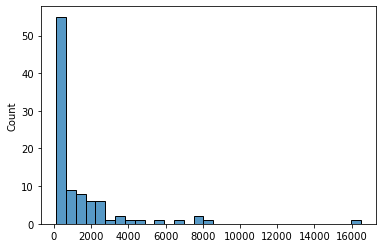

In [40]:
sns.histplot(counts)

/home/aag1234/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

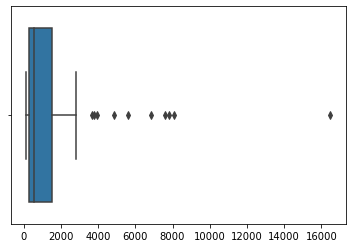

In [41]:
sns.boxplot(counts)

In [43]:
from scipy.stats import iqr
import numpy as np

In [44]:
np.percentile(counts, 25), np.percentile(counts, 50), np.percentile(counts, 75)

(281.5, 547.0, 1502.5)

In [47]:
iqr(counts)

1221.0

In [90]:
low_genres = []
for k, v in cmap:
#     if v < np.percentile(counts, 25):
    if v < np.percentile(counts, 75):
        low_genres.append(k)

In [91]:
num_songs = 0
track_ids = []
for i, row in df.iterrows():
    for g in low_genres:
        if g in row["TAGS"].split(","):
            num_songs += 1
#             print(row)
            track_ids.append(row['TRACK_ID'])
            break

In [92]:
num_songs

25879

In [93]:
len(df)

55215

In [94]:
num_songs / 55215

0.4686951009689396

In [95]:
len(set(track_ids))

25879

In [96]:
MOODPATH = "/mnt/c/Users/aag12/Downloads/autotagging_moodtheme.tsv.txt"

In [97]:
with open(MOODPATH, 'r') as f:
    moodraw = f.read()

In [98]:
num_seen = 0
for t in set(track_ids):
    if t in moodraw:
        num_seen += 1

In [99]:
num_seen

7613

In [100]:
num_seen / len(set(track_ids))

0.2941767456238649